# Random Forestのパラメータ解析
- 非常にシンプルなアルゴリズムですが、非線形等にも対応可能で、便利です

In [1]:
#ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#データ読み込み
df=pd.read_csv("muki.csv")

In [3]:
df

,name,polytyp,Tc,ref,author,link,comment,polytyp2,C_R,C_T,vol_per_atom,Z,f4,d5,L4f,S4f,J4f,(g-1)J4f,(2-g)J4f
0,Ce2Co17,Th2Zn17,1100.0,"JOURNAL OF APPLIED PHYSICS 85, 4666 (1999)","Bao-gen Shen, et al.",NaN,NaN,Th2Zn17,0.008054,0.068461,13.069350,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
1,Ce2Co7,Ce2Ni7,123.0,"Reports on Progress in Physics, 40, 1179 (1977)",K H J Buschow,NaN,NaN,Ce2Ni7,0.015191,0.053168,14.628752,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
2,Ce5Co19,NaN,293.0,"A Thesis, In the Department Of Mechanical, Ind...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CeCo2,NaN,0.0,"A Thesis, In the Department Of Mechanical, Ind...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CeCo3,NaN,78.0,"A Thesis, In the Department Of Mechanical, Ind...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CeCo5,NaN,653.0,"PHYSICAL REVIEW APPLIED 11, 014052 (2019)",Tej N. Lamichhane et al.,NaN,NaN,CaCu5,0.011834,0.059168,14.084152,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
6,Dy2Co17,Th2Ni17,1183.0,"Journal of Alloys and Compounds, 264, 19 (1998).","Shao-ying Zhang, et al.,",https://doi.org/10.1016/S0925-8388(97)00230-2,NaN,Th2Ni17,0.008158,0.069346,12.902564,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
7,Dy3Co,NaN,44.0,"Applied Physics A 99, 853 (2010)",Jun Shen et al.,NaN,NaN,Fe3C,0.029131,0.009710,25.745848,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
8,DyCo2,MgCu2,136.0,"Journal of Alloys and Compounds, 777, 152 (2019)","C.L.Wang, et al.",NaN,NaN,MgCu2,0.021469,0.042938,15.526094,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
9,DyCo3,PuNi3,450.0,"journal of physical society of japan 58, 3431 ...",Hiroshi Yoshie and Yoji Nakamura,NaN,NaN,PuNi3,0.017077,0.051231,14.639594,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000


In [4]:
#使うカラムを指定する
df=df[["Tc",'C_R', 'C_T', 'vol_per_atom', 'Z', 'f4', 'd5', 'L4f', 'S4f', 'J4f',
       '(g-1)J4f', '(2-g)J4f']]

In [5]:
#欠損(NaN)が含まれるレコードを消す 
df=df.dropna()

In [6]:
df

,Tc,C_R,C_T,vol_per_atom,Z,f4,d5,L4f,S4f,J4f,(g-1)J4f,(2-g)J4f
0,1100.0,0.008054,0.068461,13.069350,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
1,123.0,0.015191,0.053168,14.628752,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
5,653.0,0.011834,0.059168,14.084152,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
6,1183.0,0.008158,0.069346,12.902564,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
7,44.0,0.029131,0.009710,25.745848,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
8,136.0,0.021469,0.042938,15.526094,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
9,450.0,0.017077,0.051231,14.639594,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
10,973.0,0.011975,0.059875,13.917974,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
11,1160.0,0.008207,0.069757,12.826456,68.0,12.0,0.0,6.0,1.5,7.5,1.500000,6.000000
12,670.0,0.015615,0.054652,14.231359,68.0,12.0,0.0,6.0,1.5,7.5,1.500000,6.000000


# Random forestで回帰してみる (前回と一緒)

In [10]:
#x,yの設定

#Xには説明変数を設定する
X=df[['C_R', 'C_T', 'vol_per_atom', 'Z', 'f4', 'd5', 'L4f', 'S4f', 'J4f',
       '(g-1)J4f', '(2-g)J4f']]

#Yには目的変数を設定する
Y=df[["Tc"]]

C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


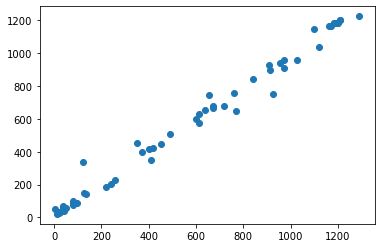

In [17]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X,Y)

#結果の予測
pred_Y=model.predict(X)
plt.scatter(Y,pred_Y)



In [18]:
#重要パラメータの可視化
pd.DataFrame([X.columns,model.feature_importances_]).T

,0,1
0,C_R,0.59539
1,C_T,0.312662
2,vol_per_atom,0.0546931
3,Z,0.00538205
4,f4,0.00414166
5,d5,0.00142513
6,L4f,0.00234989
7,S4f,0.01126
8,J4f,0.00162365
9,(g-1)J4f,0.00893496


# ハイパーパラメータを調整してみる
- n_estimators: 決定木の数
- max_depth: 探索木の深さ
- マニュアルは: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


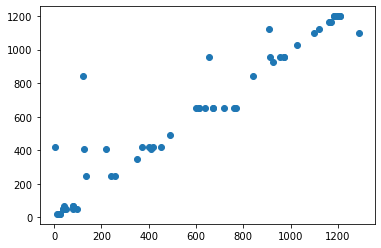

In [25]:
model=RandomForestRegressor(n_estimators=1,max_depth=5)
model.fit(X,Y)

#結果の予測
pred_Y=model.predict(X)
plt.scatter(Y,pred_Y)


# 決定木を可視化してみる

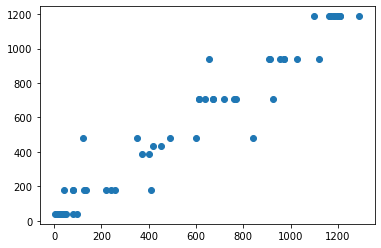

In [35]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

#決定木1本での回帰

model=DecisionTreeRegressor(max_depth=3)
model.fit(X,Y)

#結果の予測
pred_Y=model.predict(X)
plt.scatter(Y,pred_Y)


[Text(558.0, 475.65000000000003, 'C_R <= 0.017\nmse = 188012.24\nsamples = 100.0%\nvalue = 579.642'),
 Text(279.0, 339.75, 'C_T <= 0.056\nmse = 80175.985\nsamples = 57.9%\nvalue = 889.879'),
 Text(139.5, 203.85000000000002, 'Z <= 59.5\nmse = 38311.633\nsamples = 24.6%\nvalue = 627.286'),
 Text(69.75, 67.94999999999999, 'mse = 57741.84\nsamples = 8.8%\nvalue = 480.4'),
 Text(209.25, 67.94999999999999, 'mse = 8871.654\nsamples = 15.8%\nvalue = 708.889'),
 Text(418.5, 203.85000000000002, 'C_R <= 0.01\nmse = 22776.127\nsamples = 33.3%\nvalue = 1083.368'),
 Text(348.75, 67.94999999999999, 'mse = 1900.182\nsamples = 19.3%\nvalue = 1188.0'),
 Text(488.25, 67.94999999999999, 'mse = 15729.25\nsamples = 14.0%\nvalue = 939.5'),
 Text(837.0, 339.75, 'vol_per_atom <= 14.833\nmse = 21981.136\nsamples = 42.1%\nvalue = 153.067'),
 Text(697.5, 203.85000000000002, 'vol_per_atom <= 14.505\nmse = 836.188\nsamples = 7.0%\nvalue = 409.75'),
 Text(627.75, 67.94999999999999, 'mse = 240.25\nsamples = 3.5%\nval

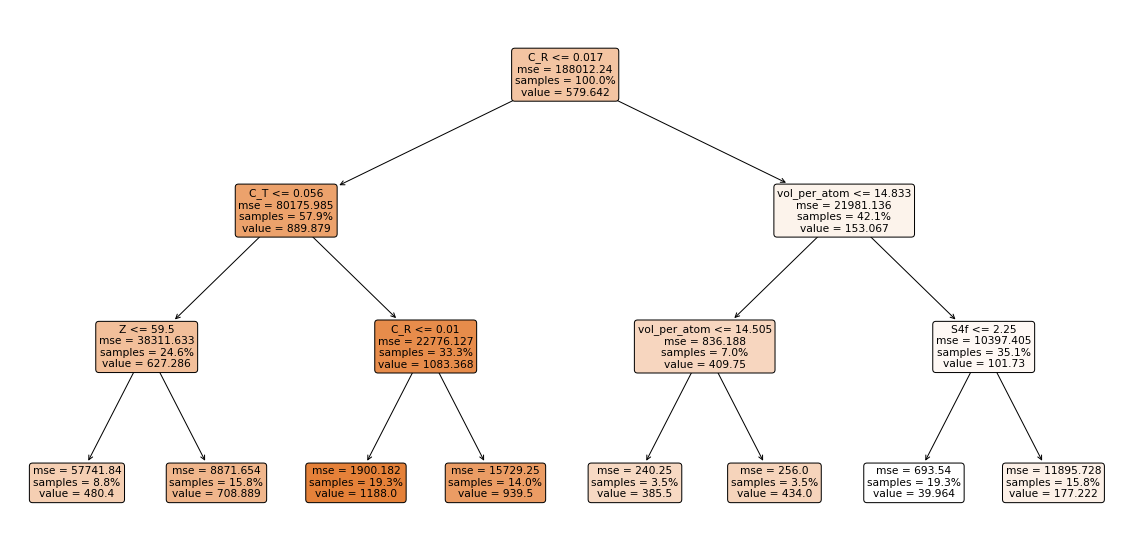

In [36]:
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=X.columns,
          filled=True, rounded=True, proportion=True)
